In [2]:
from unittest import result
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # seaborn画出的图更好看，且代码更简单，缺点是可塑性差
from sko.GA import GA
import seaborn as sns  # seaborn画出的图更好看，且代码更简单，缺点是可塑性差
from statsmodels.graphics.tsaplots import plot_acf  # 自相关图
from statsmodels.tsa.stattools import adfuller as ADF  # 平稳性检测
from statsmodels.graphics.tsaplots import plot_pacf  # 偏自相关图
from statsmodels.stats.diagnostic import acorr_ljungbox  # 白噪声检验
from statsmodels.tsa.arima.model import ARIMA
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (70, 20)  # 设置输出图片大小
sns.set(color_codes=True)  # seaborn设置背景
data=pd.read_csv('data.csv')
data.Date=pd.to_datetime(data.Date)


In [16]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy.linalg as la
import math
#模型评估


def evaluation(a, b):
    '''
    a,b为真值和预测值
    '''
    rmse = math.sqrt(mean_squared_error(a, b))  # 均方误差
    mae = mean_absolute_error(a, b)  # 绝对误差
    F_norm = la.norm(a-b)/la.norm(a)
    r2 = 1-((a-b)**2).sum()/((a-a.mean())**2).sum()
    var = 1-(np.var(a - b))/np.var(a)
    return rmse, mae, 1-F_norm, r2, var


evaluation(data[data['real_g'].notnull()]['real_g'],
           data[data['real_g'].notnull()]['predict_g']	)


(14.241694254924214,
 9.57032837016129,
 0.9904254343042184,
 0.9967601420470003,
 0.996763094105393)

In [15]:
from sklearn import metrics

a=data[data['real_g'].notnull()]['real_g']
b=data[data['real_g'].notnull()]['predict_g']

MSE = metrics.mean_squared_error(a, b)
RMSE = metrics.mean_squared_error(a, b)**0.5
MAE = metrics.mean_absolute_error(a, b)
MAPE = metrics.mean_absolute_percentage_error(a, b)

print('黄金:MSE:',MSE,'\nRMSE:',RMSE,'\nMAE:',MAE,'\nMAPE:',MAPE)

黄金:MSE: 693965.077841727 
RMSE: 833.0456637194188 
MAE: 385.1065703150609 
MAPE: 0.028272327720782003


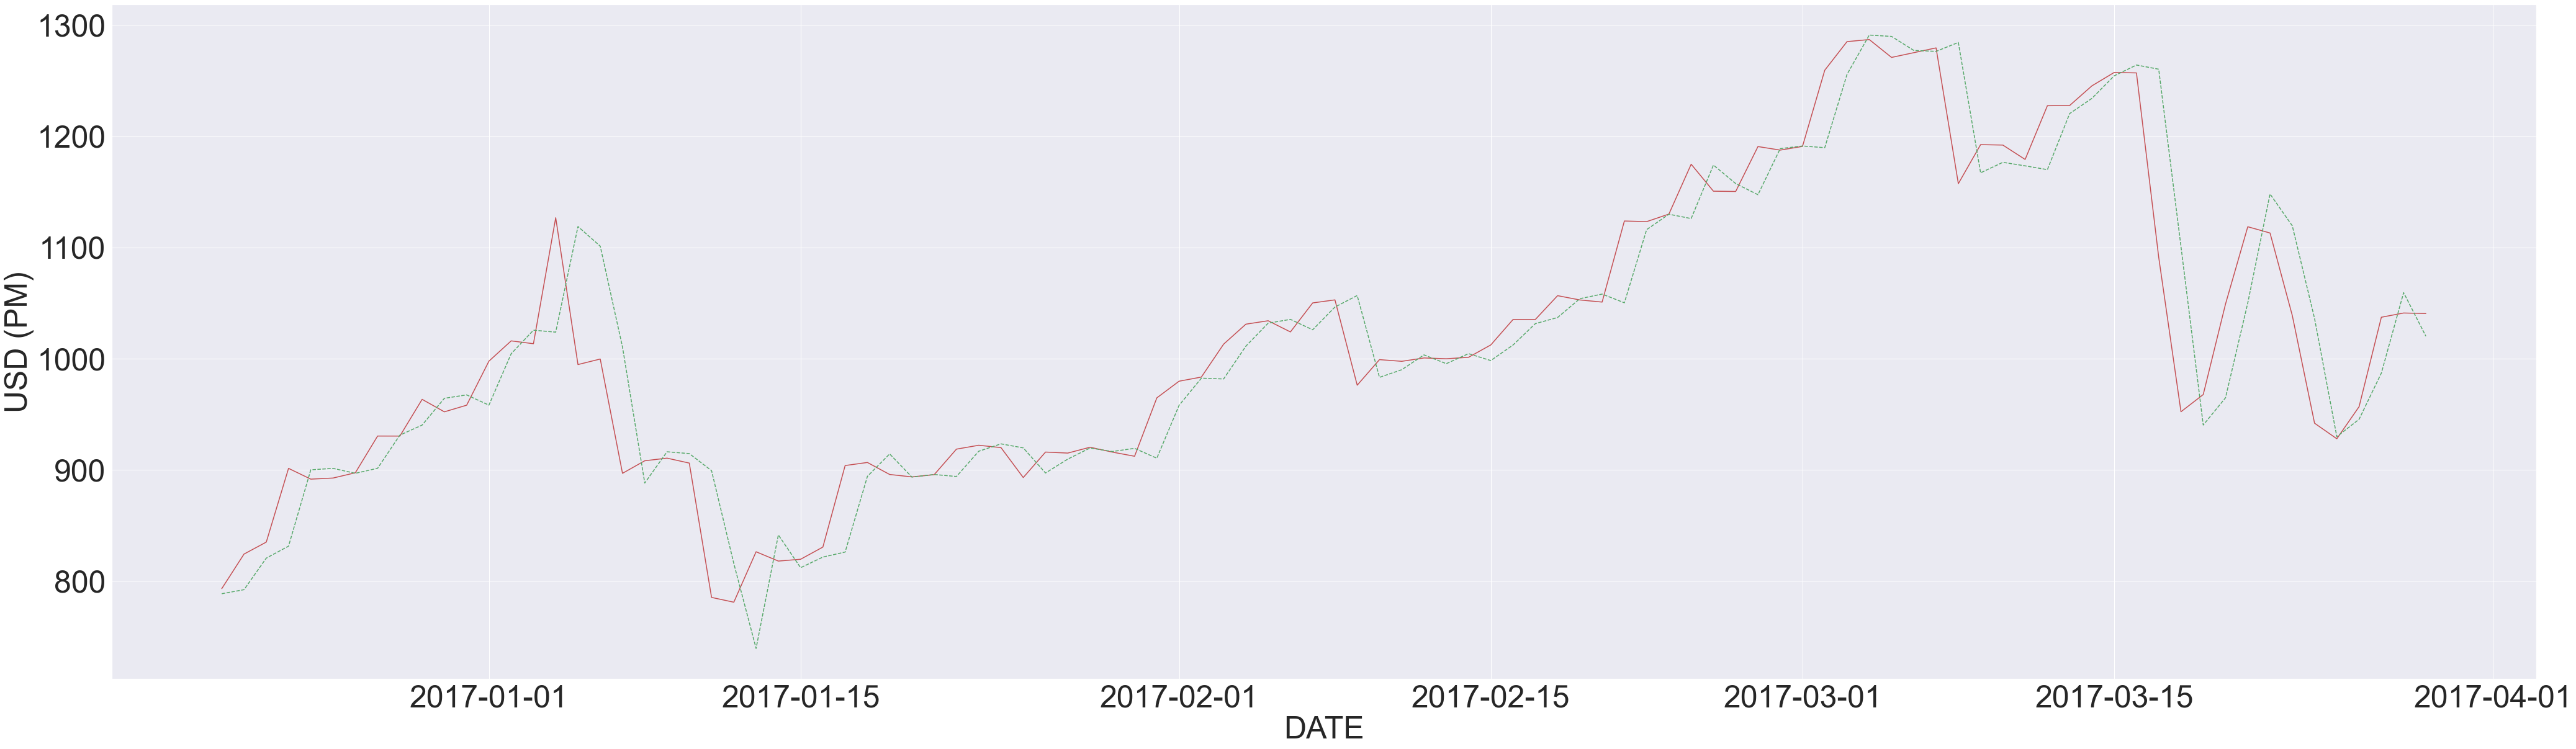

In [2]:
p1=plt.subplot(1,1,1)
p1.set_xlabel('DATE',fontsize=50)
p1.set_ylabel('USD (PM)',fontsize=50)
plt.xticks(size=50)
plt.yticks(size=50)
p1.plot(data['Date'][100:200], data['real_b'][100:200], 'r-', data['Date'][100:200], data['predict_b'][100:200],'g--')

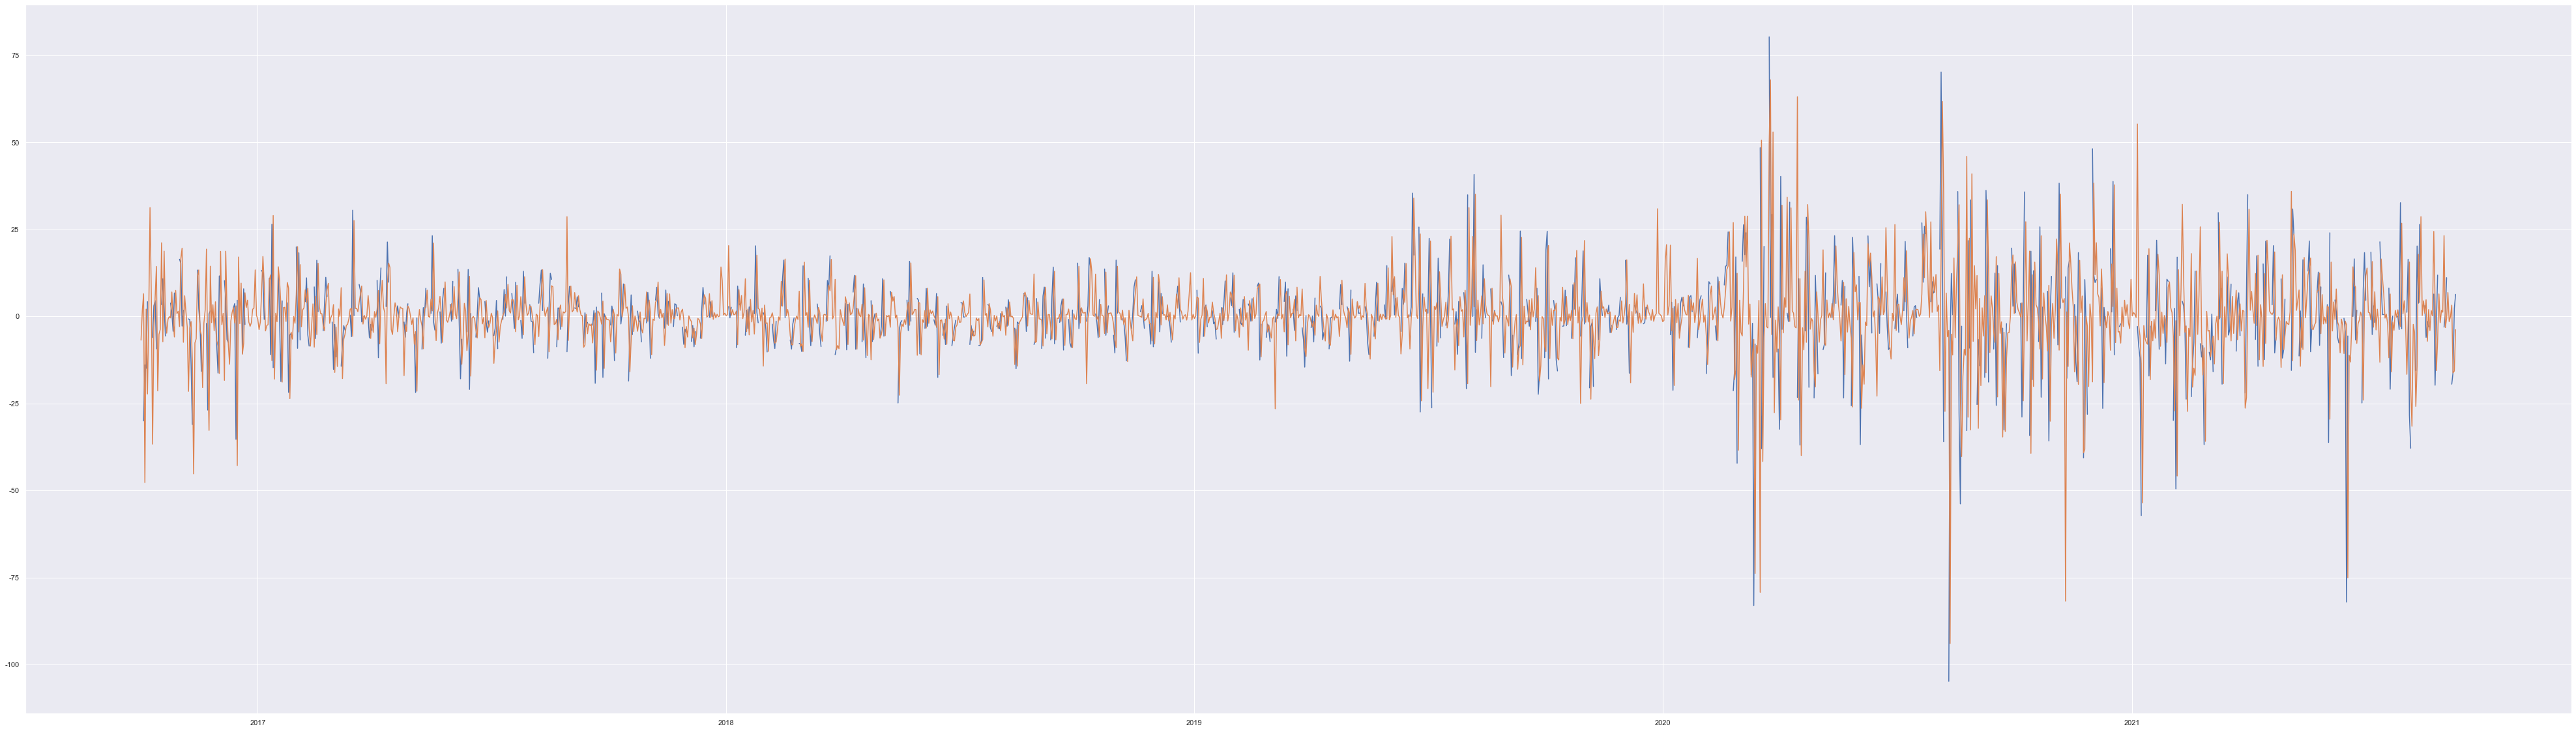

In [7]:
data['predict_g'].diff(1)
data['real_g'].diff(1)
plt.plot(data['Date'][:100], data['real_g'].diff(1)[:100],
         data['Date'][:100], data['predict_g'].diff(1)[:100])
